In [15]:
import tensorflow as tf
import matplotlib.pyplot as plt

# Create the dataset (tensors) from floats

Documentation:
- [tf.random.set_seed](https://www.tensorflow.org/api_docs/python/tf/random/set_seed)
- [tf.random.uniform](https://www.tensorflow.org/api_docs/python/tf/random/uniform)
- [About shapes](https://www.tensorflow.org/guide/tensor#about_shapes)
- [Adding a scalar to a tensor](https://www.tensorflow.org/api_docs/python/tf/math/add#used-in-the-notebooks)

In [55]:
# Set global seed
tf.random.set_seed(42)

X_train = tf.random.uniform(shape=(10, 1), minval=(-10), maxval=(10), dtype=tf.float32, seed=42)
y_train = X_train + 10

X_test = tf.random.uniform(shape=(10, 1), minval=(-10), maxval=(10), dtype=tf.float32, seed=3)
y_test = X_test + 10

# What do our datasets look like?
X_train, y_train, X_test, y_test

(<tf.Tensor: shape=(10, 1), dtype=float32, numpy=
 array([[-1.6739445 ],
        [-4.6283674 ],
        [-0.40633678],
        [-2.7085733 ],
        [ 9.094229  ],
        [ 8.837292  ],
        [ 2.2966785 ],
        [-2.831571  ],
        [ 1.8720484 ],
        [-5.6897807 ]], dtype=float32)>,
 <tf.Tensor: shape=(10, 1), dtype=float32, numpy=
 array([[ 8.326056 ],
        [ 5.3716326],
        [ 9.593663 ],
        [ 7.2914267],
        [19.094229 ],
        [18.837292 ],
        [12.296679 ],
        [ 7.168429 ],
        [11.872048 ],
        [ 4.3102193]], dtype=float32)>,
 <tf.Tensor: shape=(10, 1), dtype=float32, numpy=
 array([[ 2.7579927],
        [-6.790426 ],
        [-6.128938 ],
        [-4.9439836],
        [-3.6137486],
        [-7.235348 ],
        [-2.3143482],
        [-3.394227 ],
        [-3.4756017],
        [-8.370638 ]], dtype=float32)>,
 <tf.Tensor: shape=(10, 1), dtype=float32, numpy=
 array([[12.757993 ],
        [ 3.2095742],
        [ 3.8710618],
        [ 

## Create the model

Documentation (be aware of aliases):

- [tf.keras.Sequential](https://www.tensorflow.org/api_docs/python/tf/keras/Sequential)
- [tf.keras.layers.Input](https://www.tensorflow.org/api_docs/python/tf/keras/Input)
- [tf.keras.layers.Dense](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Dense)
- [compile method](https://www.tensorflow.org/api_docs/python/tf/keras/Sequential#compile)
- [tf.keras.losses.mae](https://www.tensorflow.org/api_docs/python/tf/keras/metrics/mean_absolute_error)
- [tf.keras.optimizers.SGD](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers/experimental/SGD)
- [fit method](https://www.tensorflow.org/api_docs/python/tf/keras/Sequential?hl=en#fit)

In [58]:
# 1. Create the model
float_model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(1,)),  # Why is it shape=(1,) and not shape=(1)?
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
float_model.compile(
    loss=tf.keras.losses.mae,  # What is the difference between MAE and MSE?
    optimizer=tf.keras.optimizers.SGD(learning_rate=0.01),
    metrics=["mae"]
)

# 3. Fit the model
float_model.fit(X_train, y_train, epochs=10)

Epoch 1/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 250ms/step - loss: 10.6124 - mae: 10.6124
Epoch 2/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 10.6007 - mae: 10.6007
Epoch 3/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 10.5889 - mae: 10.5889
Epoch 4/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 10.5772 - mae: 10.5772
Epoch 5/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 10.5655 - mae: 10.5655
Epoch 6/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 10.5537 - mae: 10.5537
Epoch 7/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 10.5420 - mae: 10.5420
Epoch 8/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 10.5303 - mae: 10.5303
Epoch 9/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 10.5185 - mae: 10.5185
Epoch 10/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 10.5068 - mae: 10.5068


## Visualize predictions

Documentation:

- [predict method](https://www.tensorflow.org/api_docs/python/tf/keras/Sequential?hl=en#predict)

In [59]:
def show_model_predictions(model):
    plt.figure(figsize=(10, 7))
    # Plot training data in blue
    plt.scatter(X_train, y_train, c="b", label="Training data")
    # Plot training data in green
    plt.scatter(X_test, y_test, c="g", label="Testing data")
    # Plot predictions in red
    plt.scatter(X_test, model.predict(X_test), c="r", label="Predictions")
    # Show a legend
    plt.legend()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


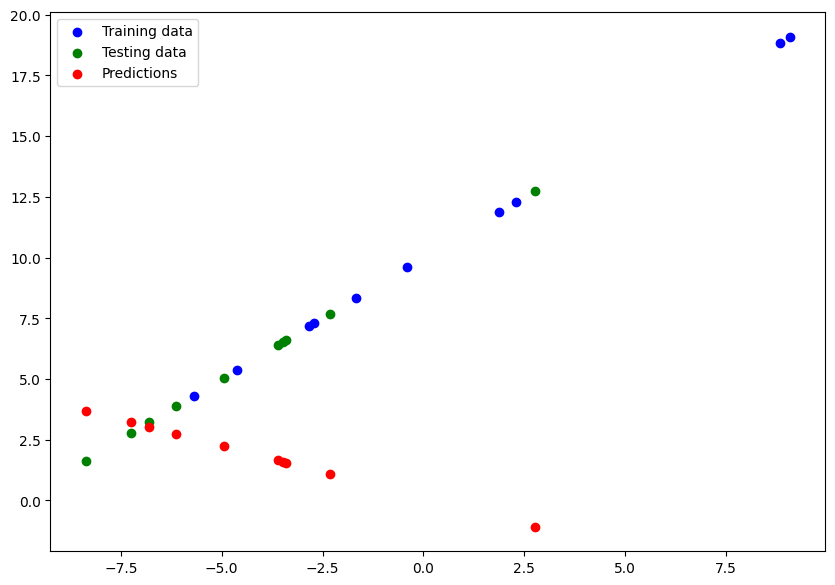

In [60]:
show_model_predictions(float_model)

## Experiment, experiment, experiment

Start simple, and make it more complex. Change one thing at a time. Type out all of the code!

- Add a new Dense layer to the model with more neurons
- Change the optimizer
- Increase or decrease the learning rate
- Train for more epochs

Run `show_model_predictions()` after each fit to test!

In [61]:
# Start here:

# 1. Create the model
# float_model_02 = 

# 2. Compile the model

# 3. Fit the model